In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
 # Download NLTK resources
 nltk.download('punkt')
 nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
 # Load the dataset
 file_path = 'X data.csv' # Update path if necessary
 data = pd.read_csv(file_path)

In [ ]:
# Ensure the dataset has the correct columns
data.columns = ['clean_text', 'category']

In [ ]:
# Drop missing values
data.dropna(subset=['clean_text','category'],inplace=True)

In [ ]:
# Data preprocessing
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(str(text).lower()) # Tokenize and lower-case
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words] # Remove stopwords and non-alphanumeric
    return ' '.join(filtered_words)



In [ ]:
#Apply Preprocessing
data['clean_text'] = data['clean_text'].apply(preprocess_text)

In [ ]:
# Splitting the data
X = data['clean_text']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert text to numeric features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
 # Train a Naive Bayes classifier
 model = MultinomialNB()
 model.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# Make predictions
y_pred = model.predict(X_test_vec)

In [ ]:
 # Evaluate the model
 print("Classification Report:\n", classification_report(y_test, y_pred))
 print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
 print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.74      0.60      0.66      7152
         0.0       0.88      0.58      0.70     11067
         1.0       0.66      0.90      0.77     14375

    accuracy                           0.73     32594
   macro avg       0.76      0.69      0.71     32594
weighted avg       0.75      0.73      0.72     32594

Confusion Matrix:
 [[ 4312   373  2467]
 [  623  6373  4071]
 [  910   505 12960]]
Accuracy Score: 0.7254402650794625


<ipython-input-48-943a9b86d7fd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=data, palette='viridis')


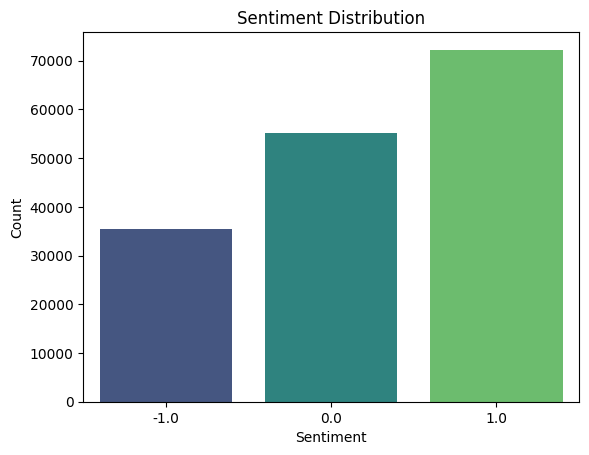

In [ ]:
 # Visualize the sentiment distribution
 sns.countplot(x='category', data=data, palette='viridis')
 plt.title('Sentiment Distribution')
 plt.xlabel('Sentiment')
 plt.ylabel('Count')
 plt.show()

In [ ]:
 # Save the model and vectorizer for future use
 import joblib
 joblib.dump(vectorizer, 'vectorizer.pkl')
 joblib.dump(model, 'sentiment_model.pkl')

['sentiment_model.pkl']

In [ ]:
# Predict sentiment for new text
def predict_sentiment(new_text):
    processed_text = preprocess_text(new_text)
    vectorized_text = vectorizer.transform([processed_text])
    return model.predict(vectorized_text)[0]

In [ ]:
 # Example of predicting sentiment for a new text
 example_text = "This is a great platform for analysis!"
 print("Predicted Sentiment for example:", predict_sentiment(example_text))


Predicted Sentiment for example: 1.0
